This notebook examines whether the pre-distraction pause has an effect on either photometry response to distractors or if it is related to the post-distraction pause. The first figures show, for each rat, the average photometry response on distraction trials when the pre-distraction pause was >5s (left) vs those when the pre-distraction pause was >5s (right). There does not appear to be a large difference - at least based on the mean. (NB all this analysis is perfomred on distraction day when distractors were present.

Below, I have regressed pre-distraction pause against post-distraction pause (collapsing all trials from all rats) and find no relationship.

At the end is a comparison of the pre-distraction pause on distracted and not distracted trials. There is no statistical difference when assessed with a paired t-text.

In [2]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

import trompy as tp

%matplotlib inline

# %run "..//JM_custom_figs.py"

In [3]:
# fig settings
scattersize=50

colors = ['darkturquoise','dodgerblue', 'darkblue']

In [4]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [5]:
# thph2.8 removed from analysis because no data on habituation day

modDict.pop('thph2.8')
disDict.pop('thph2.8')
;

''

In [6]:
rat = 'thph1.1'
d = disDict[rat]
d.keys()

dict_keys(['rat', 'rms', 'fs', 'deltaF', 'tick', 'filt_sd', 'licks', 'licks_off', 'distractors', 'distracted', 'notdistracted', 'd_bool_array', 'pdp', 'pre_dp', 'trialtype', 'lickdata', 'snips_distractors', 'snips_distracted', 'snips_not-distracted'])

In [7]:
long_pre_dp_snips = []
short_pre_dp_snips = []

rats = disDict.keys()
for rat in rats:
    d = disDict[rat]
    L_predp = np.array([pre_dp > 5 for pre_dp in d['pre_dp']], dtype=bool)

    long_pre_dp_snips.append(np.mean([snip for snip, L in zip(d['snips_distractors']['filt_z'],
                                         L_predp) if L], axis=0))
    short_pre_dp_snips.append(np.mean([snip for snip, L in zip(d['snips_distractors']['filt_z'],
                                     L_predp) if not L], axis=0))

NameError: name 'barscatter' is not defined

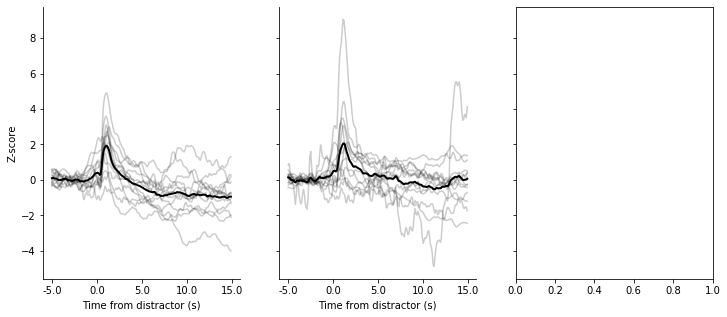

In [8]:
f, ax = plt.subplots(ncols=3, figsize=(12,5), sharey=True)
for avgsnip in long_pre_dp_snips:
    ax[0].plot(avgsnip, color='k', alpha=0.2)
ax[0].plot(np.mean(long_pre_dp_snips, axis=0), color='k', linewidth=2)

for avgsnip in short_pre_dp_snips:
    ax[1].plot(avgsnip, color='k', alpha=0.2)
ax[1].plot(np.mean(short_pre_dp_snips, axis=0), color='k', linewidth=2)

ax[0].set_ylabel('Z-score')

for axis in [ax[0], ax[1]]:
    xticks=[0, 50, 100, 150, 200]
    axis.set_xticks(xticks)
    axis.set_xticklabels([str(x/10-5) for x in xticks])
    axis.set_xlabel('Time from distractor (s)')
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)

peak_data = []
peak_data.append([np.max(snip[50:80]) for snip in long_pre_dp_snips])
peak_data.append([np.max(snip[50:80]) for snip in short_pre_dp_snips])
barscatter(peak_data, ax=ax[2], paired=True, barfacecolor=['white', 'xkcd:light grey'], barfacecoloroption = 'individual')

ax[2].set_xticks([1,2])
ax[2].set_xticklabels(['Long', 'Short'])
ax[2].set_title('Peak Z-score')
    
ax[0].set_title('Long pre-dps')
ax[1].set_title('Short pre-dps')

f.savefig(outputfolder + "short-vs-long predps.png")

In [ ]:
all_pre_dps = []
all_post_dps =[]

rats = disDict.keys()
for rat in rats:
    d = disDict[rat]
    all_pre_dps.append(d['pre_dp'])
    all_post_dps.append(d['pdp'])
    
all_pre_dps = tp.flatten_list(all_pre_dps)
all_post_dps = tp.flatten_list(all_post_dps)

In [9]:


x = all_pre_dps
y = all_post_dps

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

f, ax = plt.subplots(figsize=(6,6))

#ax.scatter(x, y)
ax.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
# ax.set_yscale('log')
# ax.set_xscale('log')

ax.set_xlabel('Pre-distraction pauses (s)')
ax.set_ylabel('Post-distraction pauses (s)')

f.savefig(outputfolder + "predps-vs-postdps.png")


NameError: name 'all_pre_dps' is not defined

In [10]:
from scipy.stats import linregress
linregress(x,y)

NameError: name 'x' is not defined

In [11]:
pre_dps_distracted = []
pre_dps_notdistracted =[]

pre_dps_distracted_all = []
pre_dps_notdistracted_all =[]

rats = disDict.keys()
for rat in rats:
    d = disDict[rat]
    
    pre_dps = [x for x, L in zip(d['pre_dp'], d["d_bool_array"]) if not L]
    pre_dps_notdistracted.append(np.mean(pre_dps))
    pre_dps_notdistracted_all.append(pre_dps)
    
    pre_dps = [x for x, L in zip(d['pre_dp'], d["d_bool_array"]) if L]
    pre_dps_distracted.append(np.mean(pre_dps))
    pre_dps_distracted_all.append(pre_dps)

pre_dps_notdistracted_all = tp.flatten_list(pre_dps_notdistracted_all)
pre_dps_distracted_all = tp.flatten_list(pre_dps_distracted_all)

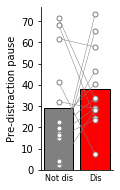

In [12]:
f, ax = plt.subplots(figsize=(2,3))
f.subplots_adjust(left=0.4)
_, barx, _, _ = tp.barscatter([pre_dps_notdistracted, pre_dps_distracted], paired=True,
            barfacecolor=["grey", "red"], barfacecoloroption='individual',
            barlabels=['Not dis', 'Dis'],
#            barlabeloffset=-0.04,
           scattersize=scattersize,
           ax=ax)

ax.set_ylabel("Pre-distraction pause")
# ax.set_ylim([-0.05, 1.1])

f.savefig(figfolder + "pre-dps_bar.pdf")

C:\ProgramData\Anaconda3\envs\dis\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


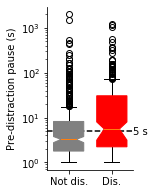

In [35]:
dis_x, dis_sem = tp.mean_and_sem(pre_dps_distracted_all)
notdis_x, notdis_sem = tp.mean_and_sem(pre_dps_notdistracted_all)

f, ax = plt.subplots(figsize=(2,3))
f.subplots_adjust(left=0.3)

boxes = ax.boxplot([pre_dps_notdistracted_all, pre_dps_distracted_all],
          widths=0.7,
          patch_artist =True,
           notch=True)

colors = ["grey", "red"]
for box, color in zip([0, 1], colors):
    for item in ['boxes']:
        plt.setp(boxes[item][box], color=color)

ax.set_yscale("log")

ax.set_ylabel("Pre-distraction pause (s)")
ax.set_xticklabels(["Not dis.", "Dis."])

ax.axhline(5, linestyle="--", color="k")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.text(ax.get_xlim()[1], 5, "5 s", ha="left", va="center")

f.savefig(figfolder + "pre-dps_box.pdf")

In [63]:
from scipy.stats import ttest_rel as ttest
from scipy.stats import ttest_ind as ttest_ind

print("Median Pre-distraction pause on not distracted trials is ", np.median(pre_dps_notdistracted_all))
print("Median Pre-distraction pause on distracted trials is ", np.median(pre_dps_distracted_all))

print(ttest_ind(pre_dps_distracted_all, pre_dps_notdistracted_all))

print(ttest_ind(np.log(pre_dps_distracted_all), np.log(pre_dps_notdistracted_all)))

print("The proportion of trials in which the last distractor was within the baseline period is approximately:")
print(len([L for L in pre_dps_notdistracted_all if L < 5]) / len(pre_dps_notdistracted_all), "for nondistracted trials.")
print(len([L for L in pre_dps_distracted_all if L < 5]) / len(pre_dps_notdistracted_all), "for distracted trials.")


### Ideally I need to calculate this in a more rigorous way - could do it by calculating all inter-distractor intervals and looking at how many were <5s.
### Or just by looking at how predps are calculated - it is probably from the first lick rather than from the distractor

Median Pre-distraction pause on not distracted trials is  3.265822720000017
Median Pre-distraction pause on distracted trials is  5.56580864
Ttest_indResult(statistic=1.3737255699774387, pvalue=0.16994974160237256)
Ttest_indResult(statistic=5.240128364556177, pvalue=2.1038028537723913e-07)
The proportion of trials in which the last distractor was within the baseline period is approximately:
0.6361323155216285 for nondistracted trials.
0.4071246819338422 for distracted trials.


In [62]:
print(len([L for L in pre_dps_notdistracted_all if L < 5]) / len(pre_dps_notdistracted_all), "for nondistracted trials.")

0.6361323155216285


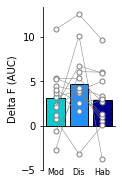

In [41]:
def get_auc_from_long_predp(daydict, epoch=[60, 90], signal="filt", predp_threshold=5):
    
    auc_list = []

    rats = daydict.keys()
    for rat in rats:
        d = daydict[rat]
        
        aucs = [np.mean(snip[epoch[0]:epoch[1]]) for snip, predp in zip(d["snips_distractors"][signal], d["pre_dp"]) if (predp > predp_threshold)]
#         print(len(aucs))
        auc_list.append(np.mean(aucs))
        
    return auc_list

epoch = [0, 50]
predp = 5

aucs_mod = get_auc_from_long_predp(modDict, epoch=epoch, predp_threshold=predp)
aucs_dis = get_auc_from_long_predp(disDict, epoch=epoch, predp_threshold=predp)
aucs_hab = get_auc_from_long_predp(habDict, epoch=epoch, predp_threshold=predp)

f, ax = plt.subplots(figsize=(2,3))
f.subplots_adjust(left=0.4)

tp.barscatter([aucs_mod, aucs_dis, aucs_hab], paired=True,
                        barfacecolor=colors, barfacecoloroption='individual',
           barlabels=['Mod', 'Dis', 'Hab'],
           barlabeloffset=0.24,
           scattersize=scattersize,
             ax=ax)

ax.set_ylabel("Delta F (AUC)")
ax.set_yticks([-5, 0, 5, 10])

f.savefig(figfolder + "aucs_from_pre-dps_bar.pdf")

In [39]:
from scipy.stats import ttest_rel as ttest


print("Pre-distraction pause on not distracted trials is ", tp.mean_and_sem(aucs_dis))
print("Pre-distraction pause on distracted trials is ", tp.mean_and_sem(aucs_hab))

print(ttest(aucs_dis, aucs_hab))

Pre-distraction pause on not distracted trials is  (3.249225503300094, 0.8397900376065762)
Pre-distraction pause on distracted trials is  (1.2004600463997994, 0.6870884098920103)
Ttest_relResult(statistic=1.9734472163184558, pvalue=0.07192309673947567)


In [19]:
import pandas as pd
df = pd.DataFrame([aucs_mod, aucs_mod, aucs_hab])

In [20]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.65475,-3.168365,10.166318,3.895167,6.105994,3.731229,3.970470,12.568251,4.263988,6.769931,5.345059,2.627283,3.946402,12.903111
1,1.65475,-3.168365,10.166318,3.895167,6.105994,3.731229,3.970470,12.568251,4.263988,6.769931,5.345059,2.627283,3.946402,12.903111
2,3.08103,0.088397,-3.752339,5.069833,6.047863,1.008006,1.275895,9.663872,3.310868,5.935280,2.636910,3.077659,0.556681,NaN


C:\ProgramData\Anaconda3\envs\dis\lib\site-packages\ipykernel_launcher.py:58: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


(0.6848711083073734, 500)

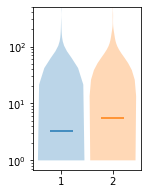

In [36]:
def halfviolin(v, half='right', fill_color='k', alpha=1,
                line_color='k', line_width=0):
    import numpy as np

    for b in v['bodies']:
        V = b.get_paths()[0].vertices

        mean_vertical = np.mean(V[:, 0])
        mean_horizontal = np.mean(V[:, 1])

        if half == 'right':
            V[:, 0] = np.clip(V[:, 0], mean_vertical, np.inf)
        elif half == 'left':
            V[:, 0] = np.clip(V[:, 0], -np.inf, mean_vertical)
        elif half == 'bottom':
            V[:, 1] = np.clip(V[:, 1], -np.inf, mean_horizontal)
        elif half == 'top':
            V[:, 1] = np.clip(V[:, 1], mean_horizontal, np.inf)

        b.set_color(fill_color)
        b.set_alpha(alpha)
        b.set_edgecolor(line_color)
        b.set_linewidth(line_width)

default_violinplot_kwargs = {'widths':0.9, 'vert':True,
                           'showextrema':False, 'showmedians':True}

violinplot_kwargs = default_violinplot_kwargs
        
f, ax = plt.subplots(figsize=(3,3))
f.subplots_adjust(left=0.4)

v = ax.violinplot(pre_dps_notdistracted_all,
                  positions=[1],
                               **violinplot_kwargs)

# halfviolin_alpha=0.7
# halfviolin(v, fill_color="grey", alpha=0.8)

v = ax.violinplot(pre_dps_distracted_all,
                  positions=[2],
                               **violinplot_kwargs)

# v = ax.violinplot(current_bootstrap[~np.isinf(current_bootstrap)],
#                               positions=[tick],
#                               **violinplot_kwargs)



# halfviolin_alpha=0.7
# halfviolin(v, fill_color="red", alpha=0.8)

ytick_color="black"
es_marker_size=4

ax.set_yscale("log")

ax.set_ylim([0, 500])

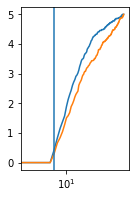

In [70]:
import seaborn as sns

f, ax = plt.subplots(figsize=(3,3))
f.subplots_adjust(left=0.4)

bins = np.arange(0,50,0.2)

notdis_hist = np.histogram(pre_dps_notdistracted_all, bins=bins, density=True)
dis_hist = np.histogram(pre_dps_distracted_all, bins=bins, density=True)

# ax.plot(notdis_hist[0][:50], color="grey")
# ax.plot(dis_hist[0][:50], color="red")


# sns.kdeplot(notdis_hist[0][:100]
#             , color="grey")

# sns.kdeplot(dis_hist[0][:100]
#             , color="red")


cumsum_notdis = np.cumsum(notdis_hist[0])
cumsum_dis = np.cumsum(dis_hist[0])

ax.plot(cumsum_notdis)
ax.plot(cumsum_dis)

ax.set_xscale("log")

ax.axvline(5)

In [17]:
d


{'rat': 'thph2.7',
 'rms': 8.365806,
 'fs': 1017.2526245117188,
 'deltaF': array([-11.944731  , -11.944609  , -11.9444895 , ...,  -0.69005847,
         -0.6901559 ,  -0.6902379 ], dtype=float32),
 'tick': array([1.63840000e-04, 1.00024320e+00, 2.00032256e+00, ...,
        3.51627919e+03, 3.51727927e+03, 3.51827935e+03]),
 'filt_sd': 16.342562,
 'licks': array([ 186.81249792,  186.92456448,  187.047936  , ..., 3420.13018112,
        3420.26010624, 3496.9182208 ]),
 'licks_off': array([ 186.85001728,  186.9774848 ,  187.10757376, ..., 3420.17622016,
        3420.31712256, 3496.91838464]),
 'distractors': [209.31919872,
  348.63169536,
  360.31938560000003,
  398.09482752,
  418.40345088000004,
  432.75616256,
  457.11491072,
  596.47131648,
  608.24223744,
  659.14535936,
  668.93316096,
  680.15685632,
  753.81768192,
  756.80759808,
  800.51093504,
  810.50566656,
  814.2536704,
  824.73549824,
  838.60013056,
  863.95568128,
  870.63560192,
  892.51528704,
  897.39231232,
  906.467082

In [18]:
d.keys()

dict_keys(['rat', 'rms', 'fs', 'deltaF', 'tick', 'filt_sd', 'licks', 'licks_off', 'distractors', 'distracted', 'notdistracted', 'd_bool_array', 'pdp', 'pre_dp', 'trialtype', 'lickdata', 'snips_distractors', 'snips_distracted', 'snips_not-distracted'])

In [21]:
d["distracted"]

[209.31919872,
 348.63169536,
 360.31938560000003,
 398.09482752,
 418.40345088000004,
 432.75616256,
 457.11491072,
 596.47131648,
 659.14535936,
 753.81768192,
 863.95568128,
 892.51528704,
 925.90063616,
 1023.5559936]

In [32]:
def get_percent_predps_in_BL(daydict):

    predp_yes = 0
    predp_no = 0
    
    rats = daydict.keys()
    for rat in rats:
        d = daydict[rat]
        
        predp_bool = 0
        for ds in d["distracted"]:
            if len([lick for lick in d["licks"] if (lick < ds-1) and (lick > ds-5)]) > 0:
                predp_yes += 1
            else:
                predp_no += 1
                
    dis_pc = predp_yes / (predp_yes + predp_no)
        
    predp_yes = 0
    predp_no = 0
    
    for rat in rats:
        d = daydict[rat]
        
        predp_bool = 0
        for ds in d["notdistracted"]:
            if len([lick for lick in d["licks"] if (lick < ds-1) and (lick > ds-5)]) > 0:
                predp_yes += 1
            else:
                predp_no += 1
                
    notdis_pc = predp_yes / (predp_yes + predp_no)
    
    return dis_pc, notdis_pc

d, n = get_percent_predps_in_BL(disDict)

In [33]:
d

0.49554896142433236

In [34]:
n

0.6259541984732825